In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [39]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
folder = 'teddy' 
file = 'teddy.csv'

In [0]:
folder = 'black'
file= 'black.csv'

In [0]:
folder = 'brown'
file = 'brown.csv'

In [0]:
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
!rm -r data/bears

In [43]:
path.ls()

[PosixPath('data/bears/teddy'),
 PosixPath('data/bears/brown'),
 PosixPath('data/bears/black')]

In [0]:
classes = ['teddy', 'brown', 'black']

In [0]:
# run the cells with file/folder and path definitions before this
download_images(path/folder/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

In [103]:
np.random.seed(42)
data = ImageList.from_folder(path=path)
data

ImageList (373 items)
Image (3, 345, 345),Image (3, 536, 466),Image (3, 723, 600),Image (3, 1016, 871),Image (3, 600, 600)
Path: data/bears

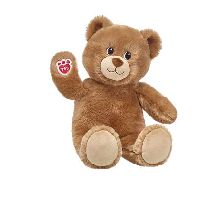

In [104]:
data[0].show()

In [0]:
data = data.split_by_rand_pct()

In [93]:
data

ItemLists;

Train: ImageList (299 items)
Image (3, 536, 466),Image (3, 723, 600),Image (3, 600, 600),Image (3, 1080, 1920),Image (3, 1248, 2073)
Path: data/bears;

Valid: ImageList (74 items)
Image (3, 2000, 3008),Image (3, 600, 600),Image (3, 466, 466),Image (3, 360, 960),Image (3, 200, 152)
Path: data/bears;

Test: None

In [0]:
data = data.label_from_folder()

In [95]:
data

LabelLists;

Train: LabelList (299 items)
x: ImageList
Image (3, 536, 466),Image (3, 723, 600),Image (3, 600, 600),Image (3, 1080, 1920),Image (3, 1248, 2073)
y: CategoryList
teddy,teddy,teddy,teddy,teddy
Path: data/bears;

Valid: LabelList (74 items)
x: ImageList
Image (3, 2000, 3008),Image (3, 600, 600),Image (3, 466, 466),Image (3, 360, 960),Image (3, 200, 152)
y: CategoryList
black,teddy,teddy,black,teddy
Path: data/bears;

Test: None

brown torch.Size([3, 732, 1000])


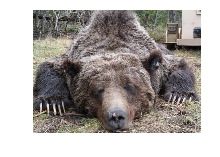

In [96]:
X_sample, y_sample = data.train[200]
X_sample.show()
print(y_sample, X_sample.shape)

In [0]:
tfms = get_transforms()
data = data.transform(tfms, size=224)

In [0]:
data = data.databunch(bs=16).normalize()

In [109]:
data.classes

['black', 'brown', 'teddy']

In [110]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'brown', 'teddy'], 3, 299, 74)

In [111]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [112]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.644653,0.141452,0.027027,02:07
1,0.367760,0.185626,0.013514,02:07
2,0.245690,0.173259,0.027027,02:06
3,0.169195,0.185160,0.040541,02:05


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [116]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


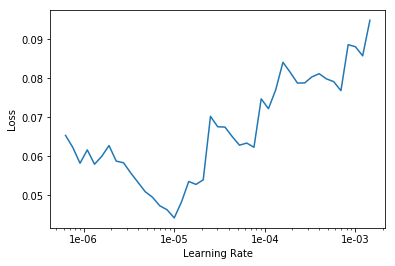

In [117]:
learn.recorder.plot()

In [118]:
learn.fit_one_cycle(3, max_lr=slice(3e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.036782,0.170698,0.027027,02:54
1,0.045082,0.183801,0.027027,02:55
2,0.053605,0.176856,0.027027,02:55
